# 1. Importing the required packages

In [41]:
import pandas as pd
import numpy as np
#  visualization packages/libraries
import matplotlib.pyplot as plt
import seaborn as sns


#Machine learning related packages
# Scikt is for machine learning
#sklearn is a library/package consoidated in a file

from sklearn.linear_model import LinearRegression # if the name has any capital letter  is a class
from sklearn.model_selection import train_test_split # if the name doesn't have capital letter, then it is a function
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error # if the name doesn't have capital letter, then it is a function


%matplotlib inline

# 2. Reading and exploring data

In [6]:
# sample data from kaggle or any open dataset source
df = pd.read_csv('Boston.csv')

In [7]:
 # last column is the ouput and other columns will be input
 # but everytime the last column won't be output, need to review and  confirm the output

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
# to get no. of rows and columns. first will be rows and next will be columns

df.shape

(506, 14)

In [10]:
# get data types for each columns/fields and 
# 1. to check the provided data types are correct or not
# 2. to check the provided data types were object or not, if the provided column has object need to typecast/encode
# 3. to convert data type, just for an example
  #df['lstat'].astype(int)


df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

# Exploratory Data Analysis

In [12]:
# Check is the any null values with the provided data

df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [13]:
# check any duplicates in the provided data

df.duplicated().sum()

0

In [14]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [8]:
#df[df.duplicated()] # to print all the rows which are duplicates

In [15]:
 # inplace true to make it permanent in the data set, axis 0 and axis 1, axis 0 -> operation column 
df.drop_duplicates(inplace=True)

# Machine Learning Process

In [20]:
#Assign columns to input and output variable

X = df.drop(columns='medv') # store all the input columns

y = df['medv'] # store the output column

In [21]:
# 1. split the data into training and testing set
# 2. test size is test data and 0.2 is 20 % and remaining are training data that is 80%

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2) 

# Apply the Linear Regression Algorithm on the data

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # will start the training process

LinearRegression()

In [25]:
# y= mx + c, below are the information
lin_reg.coef_ # print M values nothing but m1 till m13, x is the input

array([-1.32983893e-01,  5.77225669e-02,  6.53405272e-02,  2.30290308e+00,
       -2.07517995e+01,  3.60396384e+00, -3.22308696e-03, -1.61203284e+00,
        2.98322405e-01, -1.35800775e-02, -9.51539649e-01,  8.39546547e-03,
       -4.94367285e-01])

,Coeff
crim,-0.132984
zn,0.057723
indus,0.065341
chas,2.302903
nox,-20.751800
rm,3.603964
age,-0.003223
dis,-1.612033
rad,0.298322
tax,-0.013580


In [26]:
lin_reg.intercept_ # print the C value

40.025664098112415

In [30]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [34]:
# get coefficient dataset/datarame

cdf =pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
crim,-0.132984
zn,0.057723
indus,0.065341
chas,2.302903
nox,-20.751800
rm,3.603964
age,-0.003223
dis,-1.612033
rad,0.298322
tax,-0.013580


# Prediction

In [35]:
y_pred = lin_reg.predict(X_test)

In [36]:
y_pred

array([23.27007609, 13.43271462, 18.71082245, 17.34879649, 28.7115787 ,
        4.41821558, 23.04567271, 27.52324941, 20.50939108, 21.59189265,
       18.33997928,  9.77300601, 32.7726161 , 35.32955888, 22.8454725 ,
       36.51420648, 37.23870362, 20.28269183, 20.27062229, 28.26082373,
       30.92505237, 22.29443702, 17.52219155, 23.3971014 , 27.90599497,
       24.73986685, 27.40000233, 40.08858676, 11.44130485, 35.29209489,
       24.33848253, 24.08902125, 29.10162505, 34.46657471, 26.14182706,
       30.87377135,  6.42193171, 24.63199147, 34.62011965, 38.38226802,
       16.82194446, 31.01155967, 28.80839535, 18.12566295, 21.97926742,
       18.13607972, 22.38659962, 24.80358446, 32.47637215, 29.08006195,
       16.58293548,  6.3662413 , 19.21041225, 20.34196302, 23.44545836,
       -4.61156211, 24.72147405, 18.29451071, 22.15395989, 25.47778095,
       17.9721527 , 26.59652933, 28.35814949, 18.21790979, 29.83948132,
       40.89755222, 21.29995313, 35.37772548, 20.99395233, 22.41

In [37]:
y_test

116    21.2
245    18.5
105    19.5
49     19.4
272    24.4
       ... 
362    20.8
449    13.0
389    11.5
24     15.6
188    29.8
Name: medv, Length: 102, dtype: float64

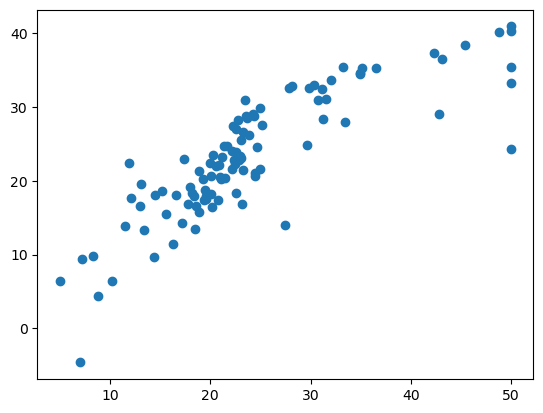

In [38]:
plt.scatter(y_test, y_pred)

E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='medv', ylabel='Count'>

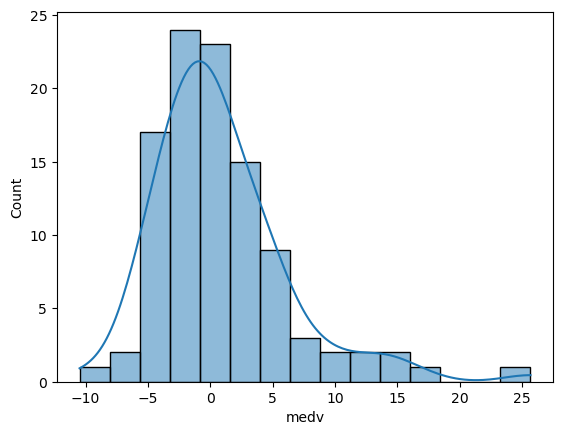

In [39]:
sns.histplot((y_test-y_pred),kde=True)

In [44]:
 # if the score is <80 percentange due to there might be outliers, very less data and increase more percentange
r2_score(y_test,y_pred)

0.6995261993209516

# Evaluating the Model

Performance Metrices for Regression

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**


In [42]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [43]:
print('MSE :', MSE)
print('MAE :', MAE)
print('RMSE :', RMSE)

MSE : 29.690840062497216
MAE : 3.748842029848772
RMSE : 5.448930175960894


if we predict any price, then that predicted price will be different than the actual price by an average of 5.44.